# Original Development Notebook

In [9]:
import csv
import GPy
import sklearn
import sobol_seq
import statsmodels
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [10]:
# 1,2,3
def branin(xx, a=1, b=((5.1/(4*np.power(np.pi, 2)))), c=(5/np.pi), r=6, s=10, t=1/(8*np.pi)):
    x1 = xx[0]
    x2 = xx[1]
    term1 = a * np.power((x2 - np.multiply(b,np.power(x1, 2)) + np.multiply(c,x1) - r),2)
    term2 = s*(1-t)*np.cos(x1)
    y = term1 + term2 + s

    return y

In [21]:
# X = [−5, 10] × [0, 15]
x1 = np.arange(-5, 10, 15/1000)
x2 = np.arange(0, 15, 15/1000)

x1 = np.repeat(x1, repeats = 1000)
x2 = np.tile(x2, reps = 1000)

xx = [x1, x2]
y = branin(xx)
y, y.size

(array([308.12909601, 307.61370022, 307.09875442, ..., 145.0723041 ,
        145.43153599, 145.79121788]), 1000000)

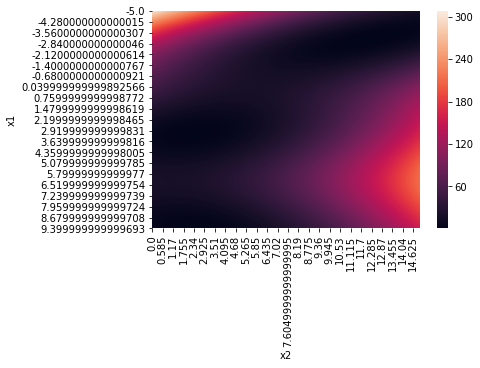

In [12]:
# (1) Make a heatmap of the value of the Branin function over the domain X = [−5, 10] × [0, 15]
# using a dense grid of values, with 1000 values per dimension, forming a 1000 × 1000 image.
df = pd.DataFrame.from_dict(np.array([x1,x2,y]).T)
df.columns = ['x1', 'x2', 'y']
data_pivoted = df.pivot("x1", "x2", "y")
ax = sns.heatmap(data_pivoted)
plt.show()

In [13]:
# (2) Describe the behavior of the function. Does it appear stationary? (That is, does the behavior
# of the function appear to be relatively constant throughout the domain?)
# DK : check https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html?highlight=adf#statsmodels.tsa.stattools.adfuller
# DK : don't run this if your computer memory is filled up. y has 1,000,000(1000*1000) points and it freezes up your computer!...PS I could never run this on my computer btw..
# stat_check = statsmodels.tsa.stattools.adfuller(df.y)
# print(stat_check[0])

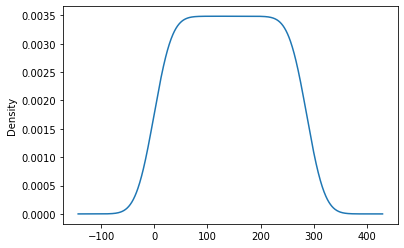

In [14]:
# kernel density estimate of LDA
lda = pd.read_csv("../lda.csv")
dy = lda.iloc[:,3]
y = list(range(len(dy)))
y = pd.Series(y)

ax = y.plot.kde()
plt.show()

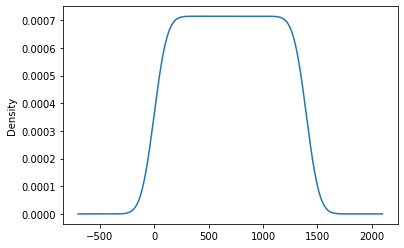

In [15]:
# kernel density estimate of SVM
svm = pd.read_csv("../svm.csv")
dy = svm.iloc[:,3]
y = list(range(len(dy)))
y = pd.Series(y)

ax = y.plot.kde()
plt.show()

In [17]:
# ###################
# ## Model fitting ##
# ###################

#####Select 32 training points using sobol sequence#####
sobel_numbers = sobol_seq.i4_sobol_generate(2, 32)
sobel_numbers

array([[0.5     , 0.5     ],
       [0.75    , 0.25    ],
       [0.25    , 0.75    ],
       [0.375   , 0.375   ],
       [0.875   , 0.875   ],
       [0.625   , 0.125   ],
       [0.125   , 0.625   ],
       [0.1875  , 0.3125  ],
       [0.6875  , 0.8125  ],
       [0.9375  , 0.0625  ],
       [0.4375  , 0.5625  ],
       [0.3125  , 0.1875  ],
       [0.8125  , 0.6875  ],
       [0.5625  , 0.4375  ],
       [0.0625  , 0.9375  ],
       [0.09375 , 0.46875 ],
       [0.59375 , 0.96875 ],
       [0.84375 , 0.21875 ],
       [0.34375 , 0.71875 ],
       [0.46875 , 0.09375 ],
       [0.96875 , 0.59375 ],
       [0.71875 , 0.34375 ],
       [0.21875 , 0.84375 ],
       [0.15625 , 0.15625 ],
       [0.65625 , 0.65625 ],
       [0.90625 , 0.40625 ],
       [0.40625 , 0.90625 ],
       [0.28125 , 0.28125 ],
       [0.78125 , 0.78125 ],
       [0.53125 , 0.03125 ],
       [0.03125 , 0.53125 ],
       [0.046875, 0.265625]])

In [22]:
xx1 = sobel_numbers[:,0]
xx2 = sobel_numbers[:,1]
xx1_domain = xx1 * 15 - 5
xx2_domain = xx2 * 15

In [23]:
# xx: 2-dimensional input, y : 1-d output
xx = np.column_stack((xx1,xx2))
input = [xx1,xx2]
y = branin(input)

In [24]:
# add noise to y
noise = np.random.normal(0,0.001,len(y))
y = y + noise
y = y.reshape(-1, 1) # or  y = pd.DataFrame(y)
## use reshape(-1, 1) if it is a single feature
xx1 = xx1.reshape(-1, 1)

In [25]:
# squared exponential covariance
# d = 2
# var = 0.2 # variance
# theta = np.asarray([0.2, 0.5, 1., 2., 4.])
# for t in theta:
#     se_kernel['.*lengthscale'] = t
#     se_kernel.plot()
#     plt.show()
## Larger the theta(lengthscale) is, bigger the kernel region is.
## Change in variance does not change the region of the kernel

In [26]:
se_kernel = GPy.kern.RBF(input_dim = 2, variance = 1, lengthscale = 1.)
m = GPy.models.GPRegression(xx, y, kernel = se_kernel)

 /Users/ricky/Desktop/School/FL2019/bayesian-methods/final-project/optimize-venv/lib/python3.6/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x12f8e99e8>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x12de0f4a8>]}

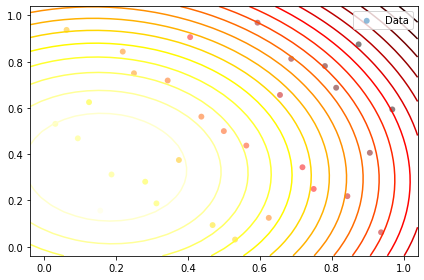

In [27]:
m.plot()
# plt.show()
# print(m)

{'dataplot': [<matplotlib.collections.PathCollection at 0x1302d9e10>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x1302d9d68>]}

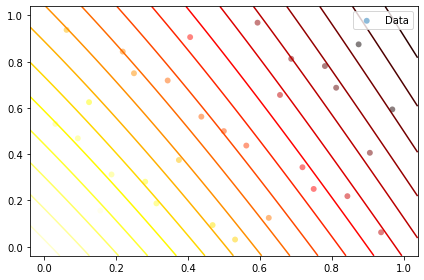

In [28]:
#optimize
m.optimize()
m.plot()
# plt.show()
# print(m)

